In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Stores.csv')

In [3]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.shape

(896, 5)

In [5]:
df['Store_Area'].value_counts()

1439    5
1513    5
1458    5
1440    5
1539    5
       ..
1509    1
1339    1
1590    1
2169    1
1387    1
Name: Store_Area, Length: 583, dtype: int64

In [7]:
df.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [8]:
df.corr()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

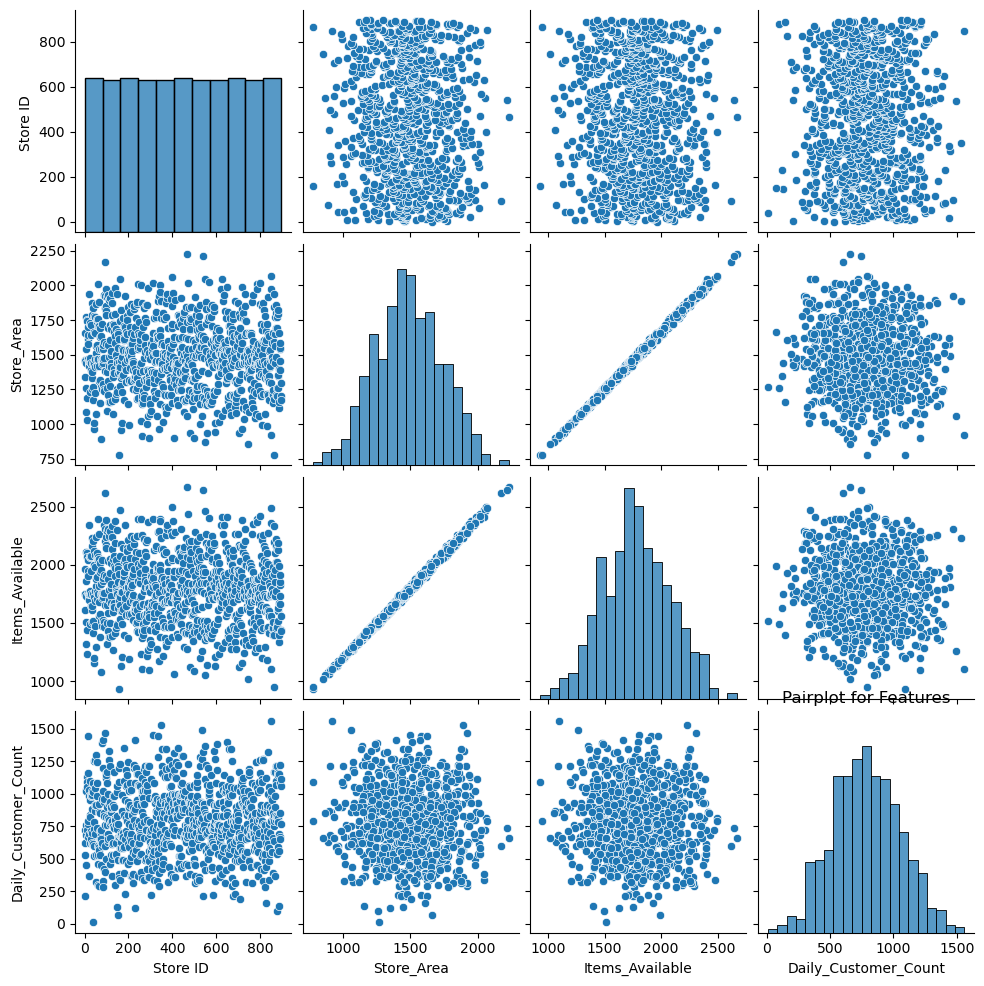

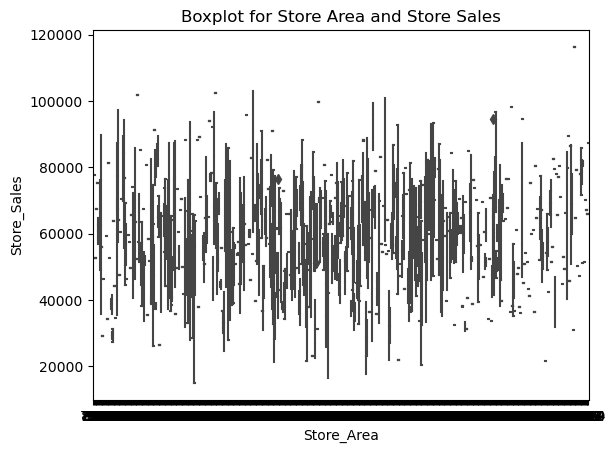

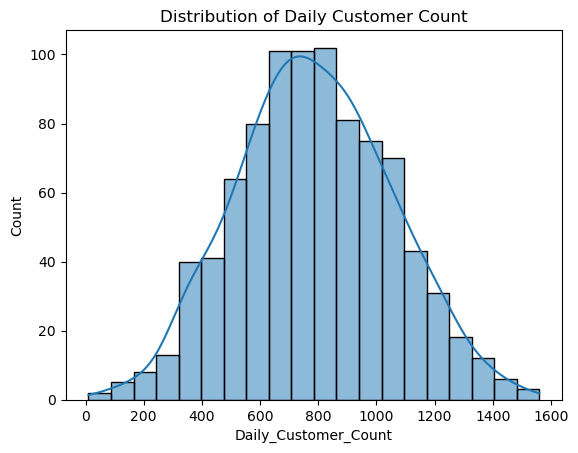

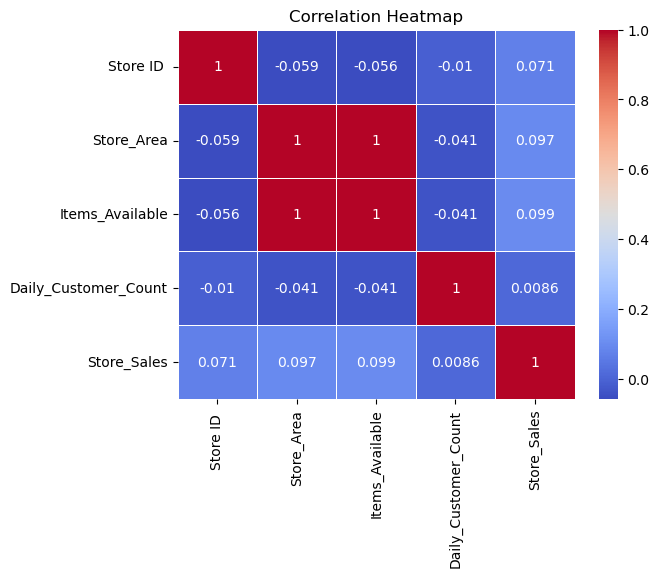

In [10]:

sns.pairplot(df[['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count']])
plt.title('Pairplot for Features')
plt.show()


sns.boxplot(x='Store_Area', y='Store_Sales', data=df)
plt.title('Boxplot for Store Area and Store Sales')
plt.show()


sns.histplot(df['Daily_Customer_Count'], bins=20, kde=True)
plt.title('Distribution of Daily Customer Count')
plt.show()


corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [12]:

# Aggregation - Aggregate by 'store_area'
df_aggregated = df.groupby('Store_Area').agg({
    'Items_Available': 'sum',
    'Daily_Customer_Count': 'mean',
    'Store_Sales': 'sum'
}).reset_index()


In [11]:
df.drop(['Store ID '], axis=1,inplace=True)

In [13]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [14]:
df_aggregated

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,775,932,1090.0,42530
1,780,951,790.0,25600
2,854,1018,660.0,77740
3,869,1050,850.0,52540
4,891,1073,630.0,67370
...,...,...,...,...
578,2063,2493,810.0,51480
579,2067,2492,790.0,70230
580,2169,2617,600.0,67080
581,2214,2647,740.0,65900


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Feature engineering - Assuming 'Items_available', 'daily_customer_count' are your features
X = df_aggregated[['Items_Available', 'Daily_Customer_Count']]
y = df_aggregated['Store_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the machine learning model (Random Forest Regressor)
model = RandomForestRegressor()

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model using the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Print the best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Now you can use the best model for predictions on new data
new_features = np.array([[100, 50]])  # Adjust these values accordingly
predicted_sales = best_model.predict(new_features)
print(f'Predicted Store Sales: {predicted_sales}')


Mean Squared Error: 747161066.4578154
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Predicted Store Sales: [71926.73333333]


C:\Users\vejen\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


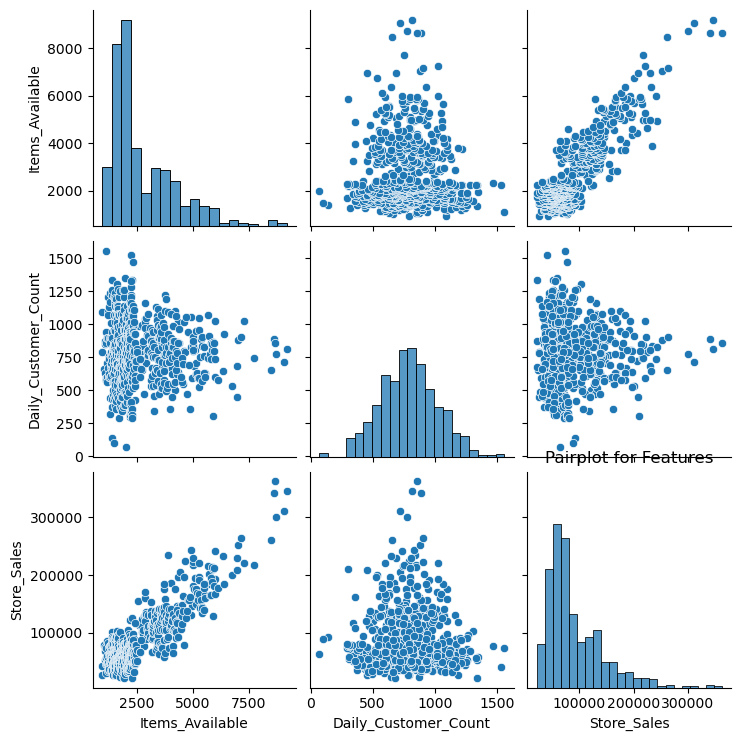

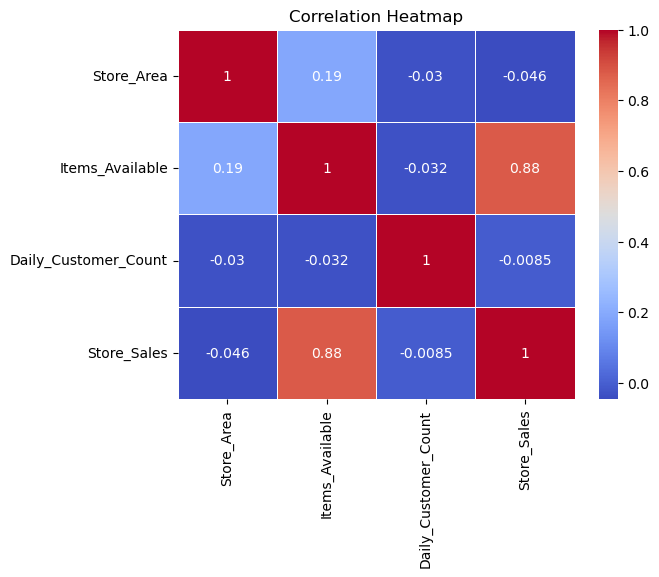

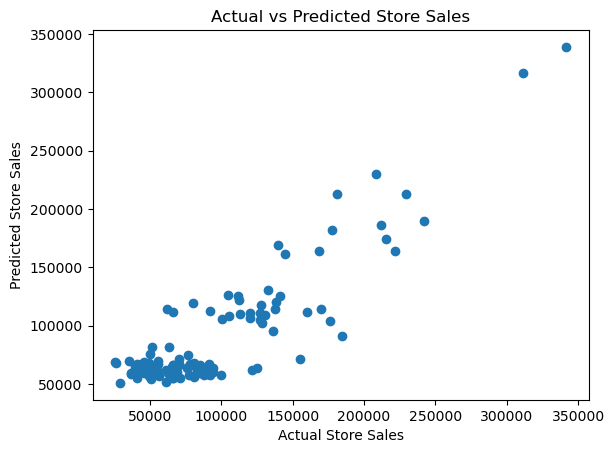

In [16]:

# Pairplot 
sns.pairplot(df_aggregated[['Items_Available', 'Daily_Customer_Count', 'Store_Sales']])
plt.title('Pairplot for Features')
plt.show()

# Correlation heatmap
corr_matrix = df_aggregated.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot for actual vs predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Store Sales')
plt.ylabel('Predicted Store Sales')
plt.title('Actual vs Predicted Store Sales')
plt.show()
